In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amananandrai/ag-news-classification-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ag-news-classification-dataset' dataset.
Path to dataset files: /kaggle/input/ag-news-classification-dataset


In [ ]:
# Define the path to the new dataset (using the identified train.csv)
new_dataset_path = "/kaggle/input/ag-news-classification-dataset/train.csv"

# Load the CSV file into a pandas DataFrame
new_df = pd.read_csv(new_dataset_path)

# Display the first 5 rows of the DataFrame
print("First 5 rows of the new DataFrame:")
display(new_df.head())

First 5 rows of the new DataFrame:


,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:

new_df['full_text'] = new_df['Title'].fillna('') + ' ' + new_df['Description'].fillna('')
class_mapping = {2: 1, 3: 0}
# Filter the DataFrame to only include the classes we are mapping
new_df_filtered = new_df[new_df['Class Index'].isin(class_mapping.keys())].copy()
new_df_filtered['sentiment'] = new_df_filtered['Class Index'].map(class_mapping)
# Store the original text before cleaning for potential comparison
new_df_filtered['original_text'] = new_df_filtered['full_text']

# Apply the same preprocessing steps as before
# 1. Remove URLs
new_df_filtered['full_text'] = new_df_filtered['full_text'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

# 2. Remove HTML tags (assuming none, but good practice)
new_df_filtered['full_text'] = new_df_filtered['full_text'].apply(lambda x: re.sub(r'<.*?>', '', x))

# 3. Remove punctuation
new_df_filtered['full_text'] = new_df_filtered['full_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# 4. Convert to lowercase
new_df_filtered['full_text'] = new_df_filtered['full_text'].apply(lambda x: x.lower())

# 5. Remove numerical digits
new_df_filtered['full_text'] = new_df_filtered['full_text'].apply(lambda x: re.sub(r'\d+', '', x))

# 6. Remove extra whitespace
new_df_filtered['full_text'] = new_df_filtered['full_text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# 7. Tokenize the text
new_df_filtered['tokens'] = new_df_filtered['full_text'].apply(lambda x: nltk.word_tokenize(x))

# 8. Remove stop words
stop_words = set(stopwords.words('english'))
new_df_filtered['tokens'] = new_df_filtered['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# 9. Apply stemming
stemmer = PorterStemmer()
new_df_filtered['tokens'] = new_df_filtered['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# 10. Join the processed tokens back into a string
new_df_filtered['processed_text'] = new_df_filtered['tokens'].apply(lambda tokens: ' '.join(tokens))

print("Preprocessing of the new dataset complete. Displaying the first few rows:")
display(new_df_filtered.head())

Preprocessing of the new dataset complete. Displaying the first few rows:


,Class Index,Title,Description,full_text,sentiment,original_text,tokens,processed_text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st bears claw back into the black reuters...,0,Wall St. Bears Claw Back Into the Black (Reute...,"[wall, st, bear, claw, back, black, reuter, re...",wall st bear claw back black reuter reuter sho...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyle looks toward commercial aerospace reut...,0,Carlyle Looks Toward Commercial Aerospace (Reu...,"[carlyl, look, toward, commerci, aerospac, reu...",carlyl look toward commerci aerospac reuter re...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil and economy cloud stocks outlook reuters r...,0,Oil and Economy Cloud Stocks' Outlook (Reuters...,"[oil, economi, cloud, stock, outlook, reuter, ...",oil economi cloud stock outlook reuter reuter ...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halts oil exports from main southern pipe...,0,Iraq Halts Oil Exports from Main Southern Pipe...,"[iraq, halt, oil, export, main, southern, pipe...",iraq halt oil export main southern pipelin reu...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",oil prices soar to alltime record posing new m...,0,"Oil prices soar to all-time record, posing new...","[oil, price, soar, alltim, record, pose, new, ...",oil price soar alltim record pose new menac us...


In [ ]:
import joblib
import os

# Directory where models were saved
model_dir = "trained_models"

# Load each model
loaded_models = {
    "Logistic Regression": joblib.load(os.path.join(model_dir, "logistic_regression_model.joblib")),
    "Multinomial Naive Bayes": joblib.load(os.path.join(model_dir, "multinomial_naive_bayes_model.joblib")),
    "Support Vector Machine": joblib.load(os.path.join(model_dir, "support_vector_machine_model.joblib"))
}

print("Loaded the following models:")
for model_name in loaded_models.keys():
    print(f"- {model_name}")

Loaded the following models:
- Logistic Regression
- Multinomial Naive Bayes
- Support Vector Machine


In [ ]:
# 1. Transform the processed_text column of the new_df_filtered DataFrame using the previously fitted tfidf_vectorizer.
X_new = tfidf_vectorizer.transform(new_df_filtered['processed_text'])

# 2. Extract the sentiment column from the new_df_filtered DataFrame and store it in a variable, for example, y_new.
y_new = new_df_filtered['sentiment']

# 3. Print the shape of the X_new matrix and the y_new vector to verify the output.
print("Shape of the new TF-IDF matrix (X_new):", X_new.shape)
print("Shape of the new target variable (y_new):", y_new.shape)

Shape of the new TF-IDF matrix (X_new): (60000, 5000)
Shape of the new target variable (y_new): (60000,)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Evaluating loaded model performance on the new dataset...")

for model_name, model in loaded_models.items():
    print(f"\n--- {model_name} ---")

    # Make predictions on the new dataset
    y_new_pred = model.predict(X_new)

    # Evaluate on the new dataset
    new_accuracy = accuracy_score(y_new, y_new_pred)
    new_precision = precision_score(y_new, y_new_pred, zero_division=0)
    new_recall = recall_score(y_new, y_new_pred, zero_division=0)
    new_f1 = f1_score(y_new, y_new_pred, zero_division=0)
    new_classification_report = classification_report(y_new, y_new_pred, zero_division=0)

    print("New Dataset Performance:")
    print(f"  Accuracy: {new_accuracy:.4f}")
    print(f"  Precision: {new_precision:.4f}")
    print(f"  Recall: {new_recall:.4f}")
    print(f"  F1-score: {new_f1:.4f}")
    print("\n  Classification Report:\n", new_classification_report)

print("\nModel evaluation on the new dataset complete.")

Evaluating loaded model performance on the new dataset...

--- Logistic Regression ---
New Dataset Performance:
  Accuracy: 0.9519
  Precision: 0.9496
  Recall: 0.9544
  F1-score: 0.9520

  Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     30000
           1       0.95      0.95      0.95     30000

    accuracy                           0.95     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.95      0.95      0.95     60000


--- Multinomial Naive Bayes ---
New Dataset Performance:
  Accuracy: 0.9474
  Precision: 0.9694
  Recall: 0.9238
  F1-score: 0.9461

  Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     30000
           1       0.97      0.92      0.95     30000

    accuracy                           0.95     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.95    

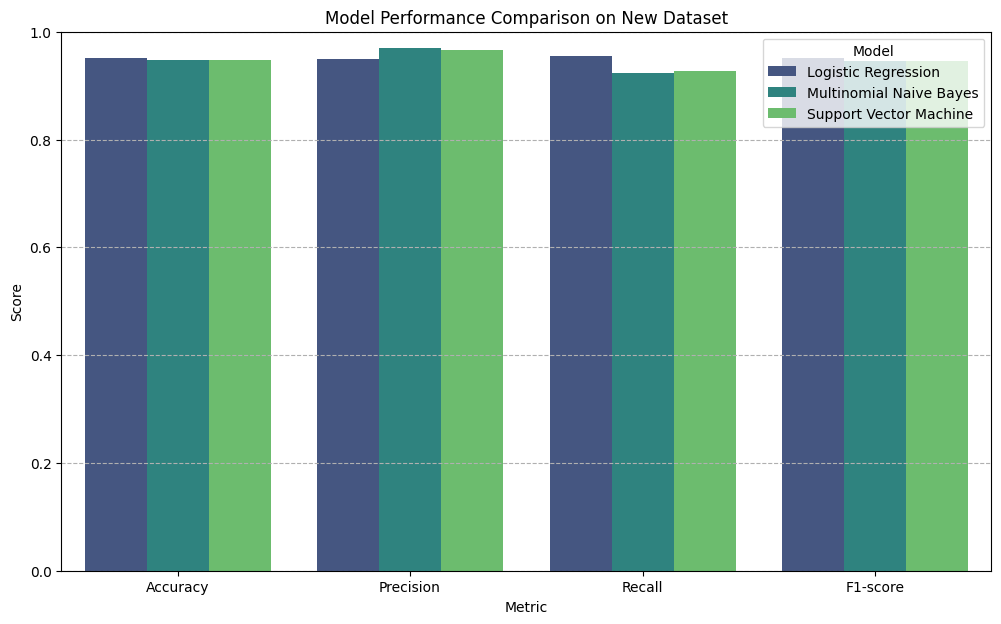

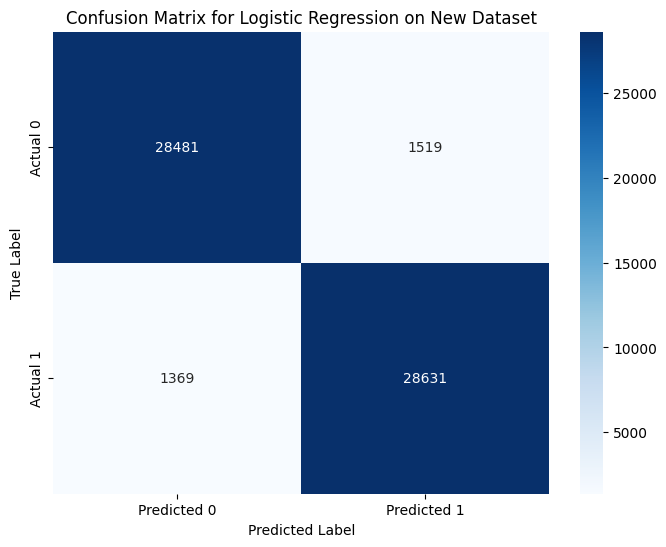

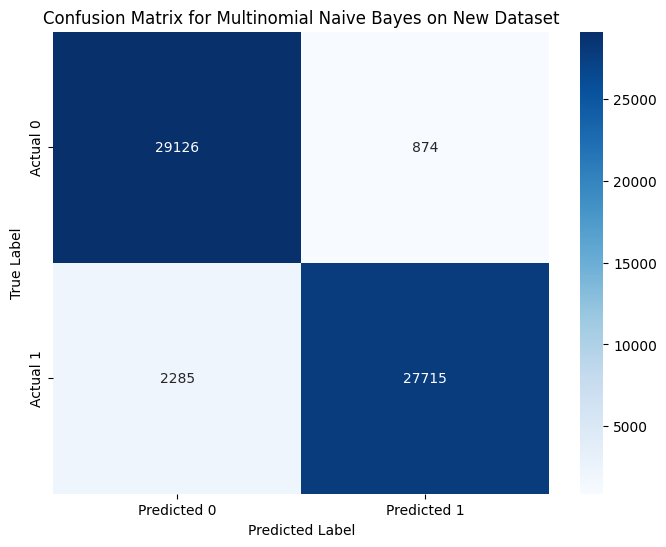

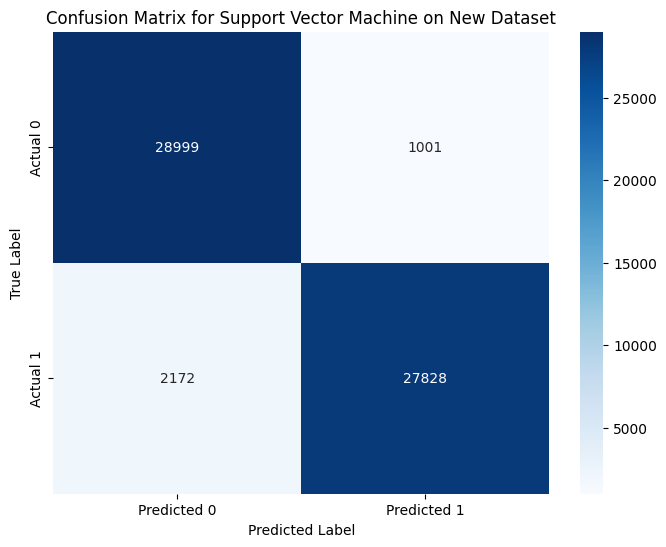

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# 1. Create a bar plot comparing evaluation metrics on the new dataset
metrics_data = {
    "Model": [],
    "Metric": [],
    "Score": []
}

# Re-calculate metrics or retrieve them from previous step if stored
# For simplicity and to ensure metrics match the visualizations, recalculating here
for model_name, model in loaded_models.items():
    y_new_pred = model.predict(X_new)
    metrics = {
        "Accuracy": accuracy_score(y_new, y_new_pred),
        "Precision": precision_score(y_new, y_new_pred, zero_division=0),
        "Recall": recall_score(y_new, y_new_pred, zero_division=0),
        "F1-score": f1_score(y_new, y_new_pred, zero_division=0)
    }
    for metric_name, score in metrics.items():
        metrics_data["Model"].append(model_name)
        metrics_data["Metric"].append(metric_name)
        metrics_data["Score"].append(score)

metrics_df = pd.DataFrame(metrics_data)

plt.figure(figsize=(12, 7))
sns.barplot(x="Metric", y="Score", hue="Model", data=metrics_df, palette="viridis")
plt.title('Model Performance Comparison on New Dataset')
plt.ylabel('Score')
plt.ylim(0, 1) # Metrics are between 0 and 1
plt.grid(axis='y', linestyle='--')
plt.show()

# 2. Generate and plot confusion matrices for each model on the new dataset
for model_name, model in loaded_models.items():
    y_new_pred = model.predict(X_new)
    cm = confusion_matrix(y_new, y_new_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {model_name} on New Dataset')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()